# Logistic Regression

#### Learning Objectives
- Understand how to apply machine learning model to classification tasks
- Explain the working mechanism of LogisticRegression: probability output, log-likelyhood etc...
- Explain performance metric for classification tasks
- Dataset: Titanic dataset

#### Introduction to Logistic Regression

- Eventhough there is the word `regression` in the name of the algorithm, this is a classification learning algorithm. The `regression` here stems from the fact that the formula of the algorithm is similar to that of linear regression.
- If the output label only has 2 different classes, then it is considered binary classification. If there are more than two different classes, it is multi-class classification
- Let's start with a simple example of binary classification (2 classes) using a toy dataset to classify student's admission to university based on two exam scores
<center><img src='./assets/logistic_regression_2.png' width="300"></center>

So what is the difference between linear regression and logistic regression? In linear regression problems, the target variable $y$ is a continuous value (e.g $y \in \mathbb{R}$). While in classification tasks, the output labels belong to a discrete set of values. (e.g $y \in  \{-1,1\}$ in binary classification, or $y \in \{1,2, \ldots, k\}$ for multi-class classification with $k$ different classes). 
In logistic classification, the output label is also a function of the linear combination of input features. However, it needs to be scaled and interpreted as a probability of belonging to certain classes. Let us denote $p_n = P(y = 1)$ as the probability of the output $y$ equals to a class (e.g classify an email as spam/ham). Let's reuse the simple 1-D example from Linear Regression with some modifications to model the Logistic Regression function.

$$p_n = \sigma(\beta_0 + \beta_1x)$$

$\sigma(.)$ is called a sigmoid function or a logistic function which serves the task of scaling the linear combination of input features to be in the range of 0 and 1 which matches the range of a probability value. The predicted class $\hat{y}$ is 1 if $p_n >= 0.5$ and 0 if $p_n < 0.5$.
The value of the logistic function is as the below graph. If $t > 0$ then the output of $\sigma(t)$ is greater than 0.5, and it is less than 0.5 if $t < 0$. It outputs $1/2$ if $t = 0$. In other words, if the linear combination of input features is positive, then the predicted output is 1, otherwise the predicted output is 0. (This is related to the vector of the hyperplane that classifies the data. Interested readers can look at the references materials). Instead of using sigmoid function, we can also use $sign(.)$ function which outputs directly $1$ if the input is positive and $-1$ otherwise.

<center><img src='./assets/sigmoid_function.png' width="500"></center>

In summary:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We are going to use Logistic Regression model to classify whether a student's performance on two exams can get him/her accepted to a university. The input features are the scores of exam 1 and 2. The output label will be either accepted `(1)` or not accepted `(0)`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import the utils script below to leverage some helper visualisation functions
from utils import plot_decision_boundary, plot_2d_boundary
%matplotlib inline

In [3]:
# start by loading the data
data = pd.read_csv("data/logistic/data1.txt", header = None, 
                   names = ["Exam 1 Score", "Exam 2 Score", "Accepted"])

# initialize some useful variables
m = len(data["Accepted"])
#x0 = np.ones(m)
exam1 = np.array((data["Exam 1 Score"]))
exam2 = np.array((data["Exam 2 Score"]))
#X = np.array([x0, exam1, exam2]).T
X = np.array([exam1, exam2]).T
y = np.array(data["Accepted"]).reshape((m,1))
m, n = X.shape

X.shape, y.shape

((100, 2), (100, 1))

Let's check the score and the acceptance of the first few students:

Visualise the data

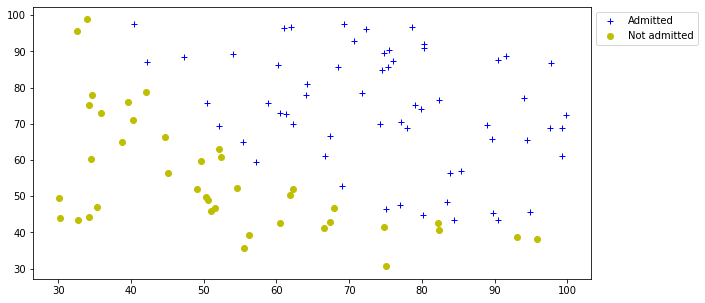

In [4]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.figure(figsize=(10,5))
# Plot examples
plt.plot(X[pos, 0], X[pos, 1], 'b+', label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

The data looks like it is linearly separable. Let's use Logistic Regression to find this line that classify the scores into 
Accepted/Not Accepted regions. 

In [ ]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Load LogisticRegression model



In [ ]:
# Process y to suit the input to train_test_split



In [ ]:
# Split the data to train and test sets



In [ ]:
# Fit the model and run the prediction



Similarly to Linear Regression, we can look at the model's coefficients through the model attributes: `logreg.coef_, logreg.intercept_`

In [ ]:
# Use function plot_2d_boundary to visualise the boundary with the corresponding coefficients
# Try it on test set, training set or the entire dataset



Eventhough there might be some points misclassified, the line is still doing a pretty good job in keeping the majority of the points on the correct side.

#### Exercise ####
- Spend some time looking at the options available in LogisticRegression page of scikit-learn documentation.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Characterisitics of different solvers: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

#### Apply the LogisticRegression model into classifying survivorship of titanic passengers
- Apply the Logistic Regression on a Kaggle dataset called Titanic survivorship
- Given a set of passenger's attributes, we need to predict whether that passenger can stay alive from the disaster

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.5);
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# Load the titanic dataset and check out its dimension, content, data type in each column


Columns description of the titanic dataset:
<center><img src='./assets/titanic_columns.png' width="800"></center>

(Adapted from Kaggle Titanic dataset)

In [ ]:
titanic_train.columns

In [ ]:
titanic_train.head()

In [ ]:
# Check for missing data in the training dataset: Age and Cabin contain quite alot of missing data, 20% and 77% respectively
titanic_train.isnull().sum() / titanic_train.shape[0]

- Because there are approximately 20% of missing data for Age, we can try to figure out which values should we use to impute.
- On the other hand, there are upto 77% missing data for Cabin, there is no point to impute this column since it is hard to figure which value should we use.
- There are approximately 0.22% missing data for Embarked, we can just impute this column with the most frequent value.

In [ ]:
# For the Age variable:
ax = titanic_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
# We can select the median age to fill in
titanic_train['Age'].mean(), titanic_train['Age'].median()

In [ ]:
print('Boarded passengers grouped by port of embarking (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic_train, palette='Set2')
plt.show()

In [ ]:
train_data = titanic_train.copy()
train_data["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(titanic_train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.shape

In [ ]:
# Double check to make sure there is no more missing data
train_data.isnull().sum()

In [ ]:
# Visualise adjusted age after modification, it looks closer to the bell curve of Gaussian distribution
plt.figure(figsize=(15,8))
ax = titanic_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### Feature Engineering

- Two features SibSp and Parch seems to relate to each other from the column description. One thing we can do is to create a new column representing the fact that the traveler is going alone or with company. Then we can drop these 2 columns

In [ ]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [ ]:
# Try perform pd.get_dummies on some categorical column to see how it works


In [ ]:
## For other categorical columns, we are going to convert them into one-hot encoding vector
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"], drop_first=True)
#training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.to_csv('data/final_titanic_train.csv', index=False)
final_train.head()

Finally, whatever changes we made to the train data, make sure we also do the same to the test data. 

(*) It's important to note here that we use the median values from the train data to impute test data to avoid data leaking issue

In [ ]:
test_data = titanic_test.copy()
test_data["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(titanic_train["Fare"].median(skipna=True), inplace=True) #Fare has 1 missing value in the test data
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"], drop_first=True)
#testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.to_csv('data/final_titanic_test.csv', index=False)

final_test.head()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X_titanic = final_train.loc[:, ~final_train.columns.isin(['Survived'])]
y_titanic = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)

# check classification scores of logistic regression
# TODO: create a logistic regression model called `logreg`
# Your code goes here:


print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

Accuracy tells the percentage of correctly identified label. The higher the accuracy the better. 
Highest accuracy score on Kaggle competition is approximately 90%, which requires a lot of feature engineering, feature selection, gridsearch as well as ensemble learning. For our current baseline, we have 78.2% accuracy with basic engineering effort and modeling. We are going to see how we can improve the performance in subsequent parts.

<a id="advanced-classification-metrics"></a>
## Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

There are other classification losses that we cannot cover in this part.

In [ ]:
print(confusion_matrix(y_test, y_pred))

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 179</td>
    <td style=""><b>Predicted: 0</b></td>
    <td style=""><b>Predicted: 1</b></td>
</tr>
<tr>
    <td><b>Actual: 0</b></td>
    <td style="text-align: center">TN = 89</td>
    <td style="text-align: center">FP = 11</td>
    <td style="text-align: center">100</td>
</tr>
<tr>
    <td><b>Actual: 1</b></td>
    <td style="text-align: center">FN = 28</td>
    <td style="text-align: center">TP = 51</td>
    <td style="text-align: center">79</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">117</td>
    <td style="text-align: center">62</td>
</tr>

</table>

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

In [ ]:
#### Classification accuracy:
print((TP + TN) / float(TP + TN + FP + FN)) # calculated using formula
print(accuracy_score(y_test, y_pred)) # calculated using accuracy_score from metrics

In [ ]:
#### Classification error:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_pred))

In [ ]:
#### Sensitivity - Recall: when the actual value is Positive/ Yes, how often does the model predict correctly?
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

In [ ]:
#### Precision: when the model predicts positive class, how often does it predict correctly?
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

#### (Optional) Discuss which metrics should we focus on for the following application?
- Spam filter
- Fraudulent transaction detector
- Filter safe videos for kids
- Detect shoplifters using surveillance system 

Unfortunately we cannot have the case when we can have high precision (low FP) and high recall (low FN) because of precision/recall tradeoff. This involves setting a threshold from which positive class and negative class are separated. As you increase or decrease the threshold limit, it will increase/ decrease the FN and FP rates.